In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon/Pokemon.csv


In [2]:
data = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')

df = pd.DataFrame(data)
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df['Type 2'] = df['Type 2'].fillna('None')

In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df.groupby('Type 2')['Attack'].mean()

Type 2
Bug          90.000000
Dark        109.800000
Dragon       94.444444
Electric     72.666667
Fairy        61.608696
Fighting    112.846154
Fire         81.250000
Flying       80.288660
Ghost        84.142857
Grass        74.160000
Ground       89.857143
Ice          98.000000
None         74.525907
Normal       52.750000
Poison       67.588235
Psychic      74.696970
Rock         84.000000
Steel        92.590909
Water        70.142857
Name: Attack, dtype: float64

In [6]:
df.groupby('Type 1')['Defense'].mean()

Type 1
Bug          70.724638
Dark         70.225806
Dragon       86.375000
Electric     66.295455
Fairy        65.705882
Fighting     65.925926
Fire         67.769231
Flying       66.250000
Ghost        81.187500
Grass        70.800000
Ground       84.843750
Ice          71.416667
Normal       59.846939
Poison       68.821429
Psychic      67.684211
Rock        100.795455
Steel       126.370370
Water        72.946429
Name: Defense, dtype: float64

In [7]:
df.groupby('Legendary')['Defense'].mean()

Legendary
False    71.559184
True     99.661538
Name: Defense, dtype: float64

In [8]:
df.corr(numeric_only=True)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [9]:
df['Physical_Score'] = df['Attack'] + df['Defense']
df['Sp_Score']=df['Sp. Atk']+ df['Sp. Def']

In [10]:
df.groupby('Type 1')['Physical_Score'].mean()

Type 1
Bug         141.695652
Dark        158.612903
Dragon      198.500000
Electric    135.386364
Fairy       127.235294
Fighting    162.703704
Fire        152.538462
Flying      145.000000
Ghost       154.968750
Grass       144.014286
Ground      180.593750
Ice         144.166667
Normal      133.316327
Poison      143.500000
Psychic     139.140351
Rock        193.659091
Steel       219.074074
Water       147.098214
Name: Physical_Score, dtype: float64

In [11]:
df['Physical_Score'].corr(df['Legendary'])

np.float64(0.35001283607162653)

In [12]:
df['Physical_Score'].skew()

np.float64(0.44145463520964123)

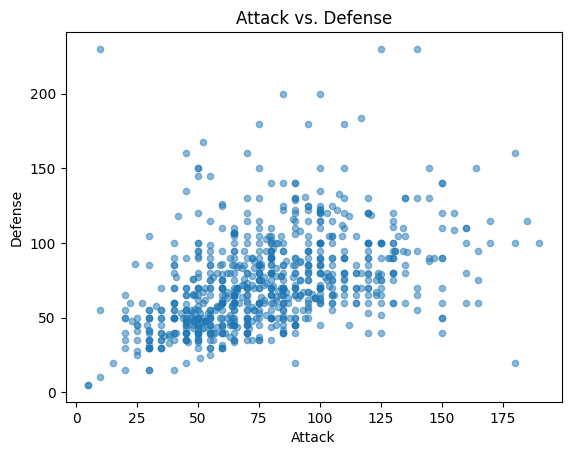

In [13]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Attack', y='Defense', alpha=0.5)
plt.title('Attack vs. Defense')
plt.show()

In [14]:
df[(df['Defense'] > 150) & (df['Attack'] > 150)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Physical_Score,Sp_Score
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,340,240


In [15]:
df[(df['Defense'] < 50) & (df['Attack'] > 175)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Physical_Score,Sp_Score
429,386,DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True,200,200


Text(0.5, 1.0, 'Average Stats by Pokémon Type')

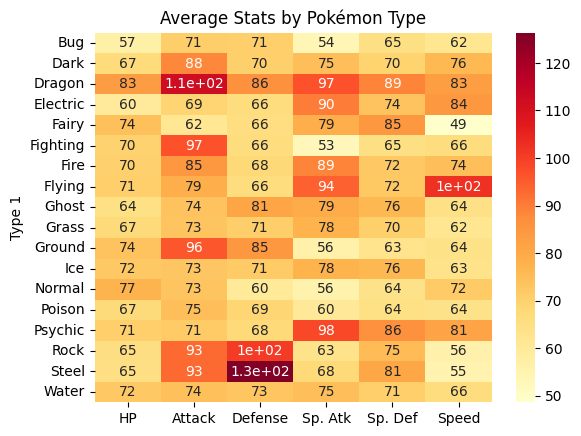

In [16]:
# Grouping by Type 1 and taking the mean of all stats
type_stats = df.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

# Plotting a heatmap
import seaborn as sns
sns.heatmap(type_stats, annot=True, cmap='YlOrRd')
plt.title('Average Stats by Pokémon Type')

In [17]:
df.groupby('Type 1')['Total'].mean()

Type 1
Bug         378.927536
Dark        445.741935
Dragon      550.531250
Electric    443.409091
Fairy       413.176471
Fighting    416.444444
Fire        458.076923
Flying      485.000000
Ghost       439.562500
Grass       421.142857
Ground      437.500000
Ice         433.458333
Normal      401.683673
Poison      399.142857
Psychic     475.947368
Rock        453.750000
Steel       487.703704
Water       430.455357
Name: Total, dtype: float64

In [18]:
df.groupby('Type 1')['Total'].std()

Type 1
Bug         117.875223
Dark        109.126217
Dragon      146.267538
Electric    105.721952
Fairy       123.781680
Fighting    102.464378
Fire        109.760496
Flying      161.400124
Ghost       110.072685
Grass       106.650626
Ground      123.913081
Ice         108.281027
Normal      115.733038
Poison       92.358687
Psychic     139.026645
Rock        108.059227
Steel       115.420907
Water       113.188266
Name: Total, dtype: float64

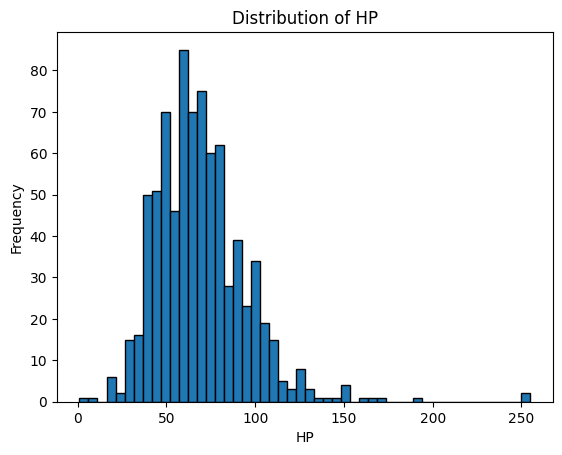

In [28]:
df['HP'].plot(kind='hist',bins=50,edgecolor='black')
#width of bin = range of HP (255)/ bins (50) = 5
# if bins = 50 , then 1st bar contains no. of pokemons with HP 0-50
# each bar repesents 5 hp 
plt.title('Distribution of HP')

plt.xlabel('HP')
plt.show()

<Axes: xlabel='Speed', ylabel='Defense'>

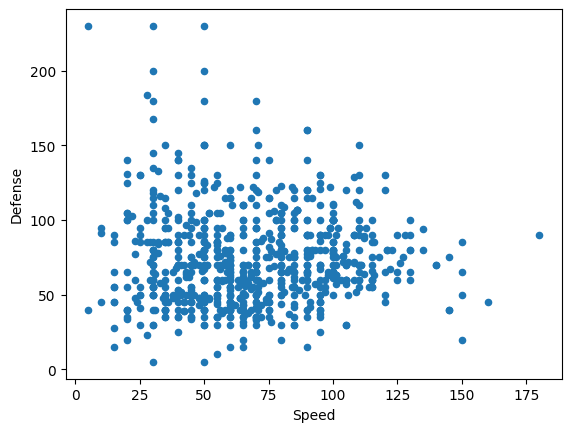

In [29]:
df.plot(kind='scatter',x='Speed',y='Defense')

/tmp/ipykernel_55/3555682526.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type 1', y='Attack', data=subset, inner='box', palette='muted')


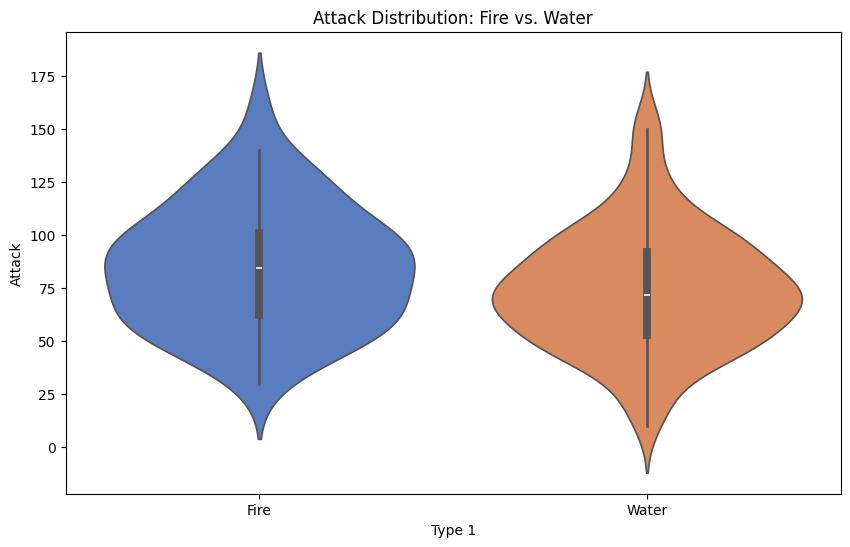

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# We will filter for just two types to keep the visual clean
subset = df[df['Type 1'].isin(['Fire', 'Water'])]

# Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type 1', y='Attack', data=subset, inner='box', palette='muted')

plt.title('Attack Distribution: Fire vs. Water')
plt.show()

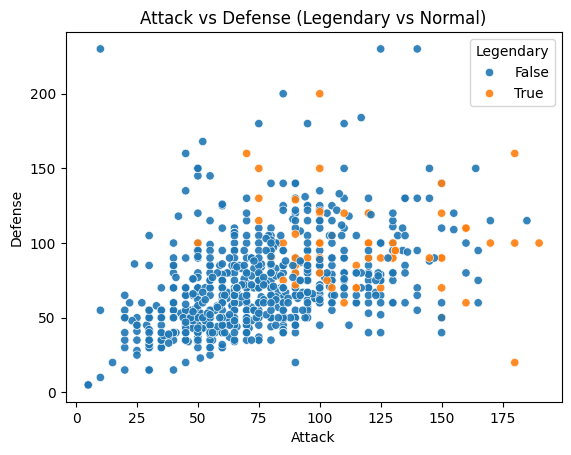

In [40]:
sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=df, alpha=0.9)
plt.title('Attack vs Defense (Legendary vs Normal)')
plt.show()

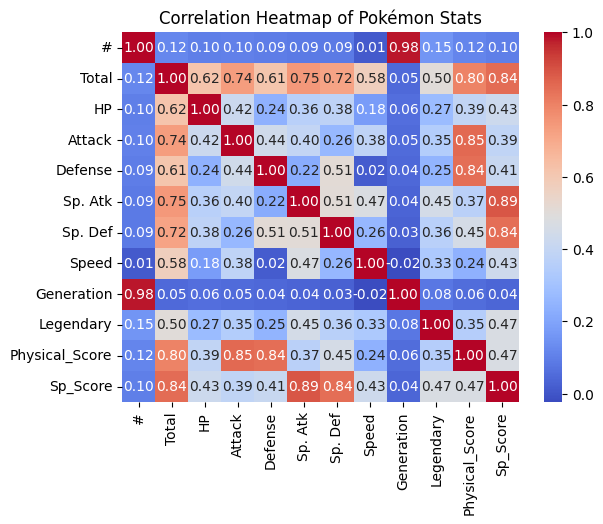

In [43]:
# Calculating the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

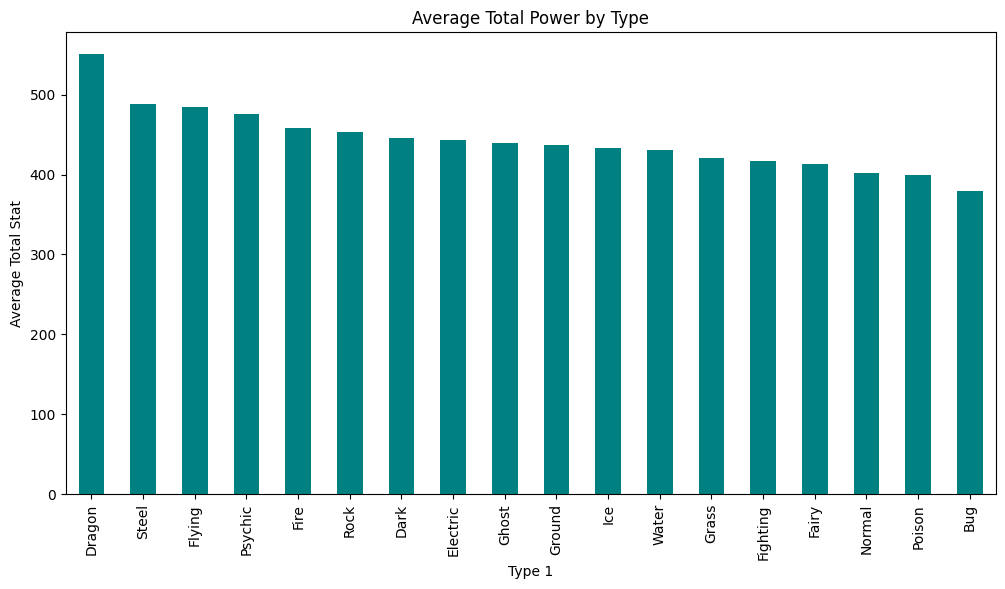

In [45]:
type_means = df.groupby('Type 1')['Total'].mean().sort_values(ascending=False)

# Plotting
type_means.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Average Total Power by Type')
plt.ylabel('Average Total Stat')
plt.show()